In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split


## PREPARING DATA

In [2]:
#Training set:  852 triples annotated as correct and incorrect

data = pd.read_csv('annotatedTriples.csv',sep="\t", decimal=",", index_col=False, dtype={'TABLE':str})


In [3]:
#Updating contextual triples
#contextual=data[data['VALIDATION']==3]
#contextual.to_csv('contextual_triples.csv', sep='\t', decimal=',',  float_format='%.10f')

In [4]:
data=data[(data['VALIDATION']<3)].reset_index(drop=True)
print("Size: ", data.shape)
#data1=data[data['ORIGIN']=='f']
data.head(3)

Size:  (852, 69)


,2,3,4,5,6,7,8,9,10,11,...,VALIDATION,ORIGIN,CLUSTER,TABLE,CELL,NAME_COL1,NAME_COL2,ENTITY_COL1,PREDICATE,ENTITY_COL2
0,9,11,6,1.833333,24,-1,2,5,5,1.0,...,2,t,0,203221.9,13:-1:2,protag_article@3,candid@3,https://en.wikipedia.org/wiki/Electoral_result...,P1346 :winner@en,https://en.wikipedia.org/wiki/Voter_turnout :Q...
1,8,6,6,1.000000,11,-1,1,5,5,1.0,...,2,t,0,238845.8,4:-1:1,protag_article@3,2__parti@3,https://en.wikipedia.org/wiki/Gravesham_Boroug...,P488-1 :chairperson@en,https://en.wikipedia.org/wiki/Labour_Party_(UK...
2,8,13,6,2.166667,28,-1,2,6,6,1.0,...,2,t,0,242238.8,17:-1:2,protag_article@3,candid@3,https://en.wikipedia.org/wiki/Electoral_result...,P488 :chairperson@en,https://en.wikipedia.org/wiki/Voter_turnout :Q...


In [5]:
data.describe()

,2,3,4,5,6,7,8,9,10,11,...,56,57,58,59,60,61,62,63,VALIDATION,CLUSTER
count,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,...,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,8.520000e+02,852.000000,8.520000e+02
mean,4.867371,118.609155,7.764085,21.012787,2271.332160,1.931925,2.991784,88.605634,86.784038,1.008263,...,37774.588028,3605.549296,1043.991784,3422.158451,109387.808685,0.061984,0.043405,8.620954e+04,1.712441,8.620954e+04
std,13.623182,299.665648,12.114009,51.735646,17475.905677,6.850258,8.268621,237.518733,229.219147,0.284525,...,87457.634155,26187.643886,8688.224145,25403.361476,199257.575466,0.137363,0.110518,1.943094e+05,0.452890,1.943094e+05
min,1.000000,1.000000,2.000000,0.142857,1.000000,-1.000000,0.000000,1.000000,1.000000,0.283525,...,2.000000,1.000000,1.000000,1.000000,4.000000,0.000003,0.000002,0.000000e+00,1.000000,0.000000e+00
25%,1.000000,13.000000,4.000000,2.220238,42.000000,-1.000000,1.000000,9.000000,9.000000,1.000000,...,256.750000,2.000000,1.000000,2.000000,519.750000,0.000325,0.000162,3.200000e+01,1.000000,3.200000e+01
50%,1.000000,29.000000,5.000000,4.750000,123.000000,1.000000,1.000000,21.000000,21.000000,1.000000,...,2857.000000,10.000000,4.500000,7.000000,9288.000000,0.006329,0.003760,7.795000e+02,2.000000,7.795000e+02
75%,3.000000,84.000000,7.000000,14.562500,540.250000,3.000000,3.000000,55.250000,59.000000,1.000000,...,26148.250000,95.000000,41.000000,62.250000,57332.000000,0.047066,0.025106,2.704825e+04,2.000000,2.704825e+04
max,239.000000,3142.000000,137.000000,523.666667,422891.000000,68.000000,100.000000,3122.000000,3122.000000,6.785185,...,363350.000000,300682.000000,103771.000000,293146.000000,646277.000000,0.917891,0.954107,1.100194e+06,2.000000,1.100194e+06


In [6]:
contextual = pd.read_csv('contextual_triples_new.csv',sep="\t", decimal=',',index_col=False, dtype={'TABLE':str})
contextual=contextual[(contextual['VALIDATION']<=3)]

In [7]:
clusters = pd.read_csv('numTablesByCluster.csv',sep="\s+", index_col=False)
clusters=clusters.rename(columns={'cluster': 'CLUSTER', '1':'65'})
clusters.head(2)

,65,CLUSTER
0,82793,0
1,59658,1


In [8]:
data=pd.merge(data, clusters, on=['CLUSTER'])

In [9]:
data2=data.copy()
data2=data2.append(contextual)
del data2['65']
data2=pd.merge(data2, clusters, on=['CLUSTER'])
data2.head(2)

/home/jhomara/.local/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,10,11,12,13,14,15,16,17,18,19,...,CLUSTER,ENTITY_COL1,ENTITY_COL2,NAME_COL1,NAME_COL2,ORIGIN,PREDICATE,TABLE,VALIDATION,65
0,5,1.0,1,4,0.25,5,4,0.000505,0.000603,0.000753,...,0,https://en.wikipedia.org/wiki/Electoral_result...,https://en.wikipedia.org/wiki/Voter_turnout :Q...,protag_article@3,candid@3,t,P1346 :winner@en,203221.9,2,82793
1,5,1.0,1,4,0.25,5,4,0.000136,0.000122,0.000081,...,0,https://en.wikipedia.org/wiki/Gravesham_Boroug...,https://en.wikipedia.org/wiki/Labour_Party_(UK...,protag_article@3,2__parti@3,t,P488-1 :chairperson@en,238845.8,2,82793


In [10]:
data2.columns

Index(['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '6', '60', '61', '62', '63', '7', '8', '9', 'CELL',
       'CLUSTER', 'ENTITY_COL1', 'ENTITY_COL2', 'NAME_COL1', 'NAME_COL2',
       'ORIGIN', 'PREDICATE', 'TABLE', 'VALIDATION', '65'],
      dtype='object')

In [11]:
contextual['17'].sum()

0.7824168604000001

### Normalizing some features

I applied normalization over some feautures, but I didn't get to much difference

In [12]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:        
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


In [13]:
#Next features are not used, since cells with more than one link were deleted. 
#21 number entities subject cell
#22 number entities object cell
#23 ratio 21/22
#38 exist relation in KB
#43 number links subject cell
#44 number links object cell

# Features not normalized:
#7 subject column index
#8 object column index 
#26 & 27 formatting present in cells (values: 0,1)
#37 relation from title article (values: 0,1)
#39 object is in range of predicate (values: 0,1)
#40 subject is in domain of predicate (values : 0,1)
#63 num of cluster
#64 Inverse predicate

noImportant=['21','22','23','38','43','44']
noNormalized=['7','8', '26', '27', '37','39','40','63','64','VALIDATION']
def filterFeatures(data):
    #Adding feature for inverse property
    data['64']=data.PREDICATE.str.contains('-1')
    data['64']=np.where(data['64'],0,1)
    data.head(2)
    r1 = [str(i) for i in np.arange(2,66) if str(i) if str(i) not in noImportant and str(i) not in noNormalized]
    r1.append('VALIDATION')
    x=data[r1]
    r1 = [c for c in list(x.columns) if c not in noNormalized]
    d1=x[r1]
    
    #Normalized features
    xn=normalize(d1)
    xf=pd.concat([xn, data[noNormalized]], axis=1)
    fcols=[c for c in list(xf.columns) if c!='VALIDATION']
    X=xf[fcols]
    Y=xf['VALIDATION']
    colnames={n:int(n) for n in list(X.columns)}
    
    #Numeric name features and sorting
    X=X.rename(columns=colnames)
    X = X.sort_index(axis=1)    
    #Final dataFrame
    xf=pd.concat([X, Y], axis=1)
    print("Number of correct triples: ", xf[xf['VALIDATION']==1].shape)
    print("Number of incorrect triples: ", xf[xf['VALIDATION']==2].shape)
    return xf

In [14]:
#Filter Features:
xf=filterFeatures(data)
X=xf.iloc[:,:-1].values
Y=xf['VALIDATION'].values

Number of correct triples:  (245, 59)
Number of incorrect triples:  (607, 59)


In [15]:
#Filter Features2:
#data2[['62']]
xf2=filterFeatures(data2)
X2=xf2.iloc[:,:-1].values
Y2=xf2['VALIDATION'].values

Number of correct triples:  (277, 59)
Number of incorrect triples:  (620, 59)


# Features overview

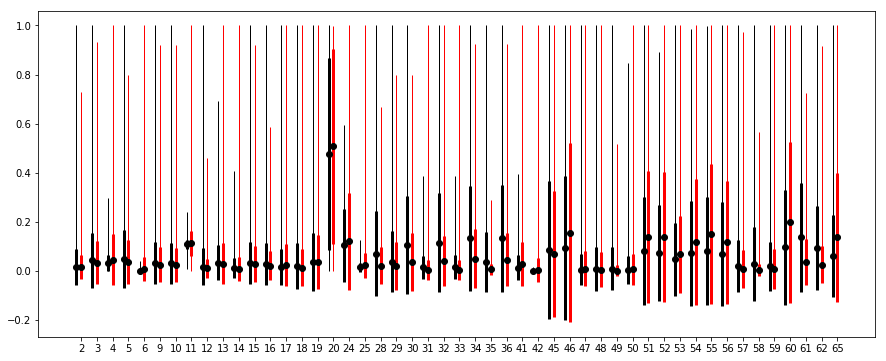

In [16]:
#Comparison all features 
#CORRECT TRIPLES

%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 6]

c=xf[xf['VALIDATION']==1].iloc[:,:-1]
inoNormalized=[int(noNormalized[n]) for n in range(len(noNormalized)-1)]
cols=[col for col in list(c.columns) if col not in inoNormalized]
c=c[cols]
mins = c.min().values
maxes = c.max().values
means = c.mean().values
std = c.std().values

plt.errorbar(np.arange(len(list(c.columns))), means, std, fmt='ok', lw=3)
plt.errorbar(np.arange(len(list(c.columns))), means, [means - mins, maxes - means],
             fmt='.k', ecolor='black', lw=1)

#INCORRECT TRIPLES
i=xf[xf['VALIDATION']==2].iloc[:,:-1]
inoNormalized=[int(noNormalized[n]) for n in range(len(noNormalized)-1)]
cols=[col for col in list(i.columns) if col not in inoNormalized]
i=i[cols]

mins = i.min().values
maxes = i.max().values
means = i.mean().values
std = i.std().values


plt.errorbar([i+0.3 for i in range(len(list(i.columns)))], means, std, fmt='ok',ecolor='red', lw=3)
plt.errorbar([i+0.3 for i in range(len(list(i.columns)))], means, [means - mins, maxes - means],
             fmt='.k', ecolor='red', lw=1)
plt.xticks([i+0.3 for i in range(len(list(i.columns)))], [str(i) for i in list(i.columns)])
plt.show()

<Figure size 1080x432 with 0 Axes>

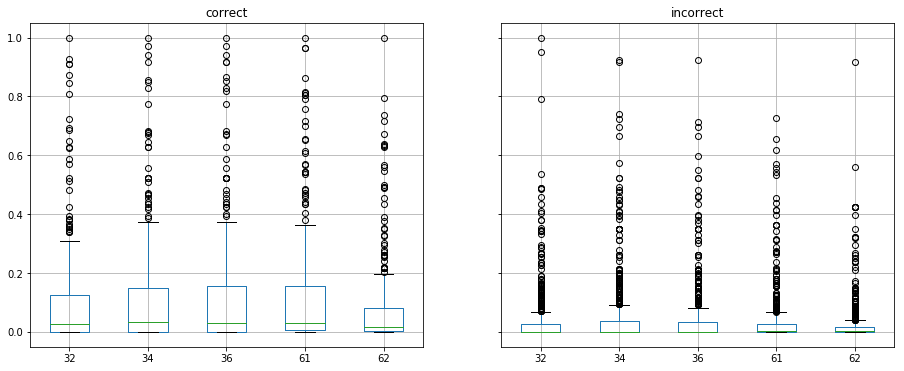

In [17]:
#Features validation to idenfify outliers

#32 Ratio number rows where predicate holds / total rows
#34 Ratio number relations where predicate holds / total relations
#36 Ratio number unique relations where predicate holds / total unique relations
#61 Ratio number relations where predicate holds / total relations in cluster
#62 Ratio number rows where predicate holds / total rows in cluster

c=xf[xf['VALIDATION']==1][[32,34,36,61,62]]
c.describe()

i=xf[xf['VALIDATION']==2][[32,34,36,61,62]]
i.describe()

c['key'] = 'correct'
i['key'] = 'incorrect'
plt.figure()
DF = pd.concat([c,i],keys=['correct','incorrect'])
DFGroup = DF.groupby(['key'])
ax=DFGroup.boxplot()
plt.show()

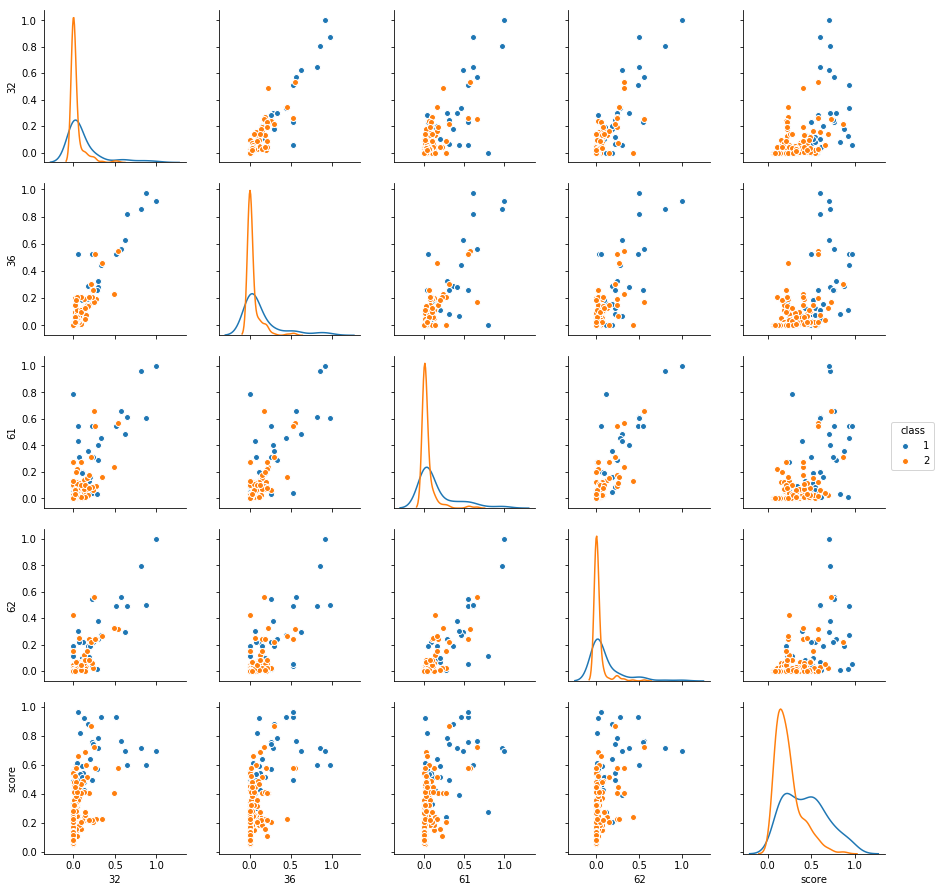

In [18]:
x_filteredf=xf[[20,48,47,49,50,42,30,28,41,39,29,40,27,45,46,26,32,36,61,62]]
y_filteredf=xf[['VALIDATION']]
#Training RF with to get probability scores
RF=RandomForestClassifier(min_samples_split=3, max_depth=5, n_estimators=5, min_samples_leaf=3, max_features=3, bootstrap=True)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(x_filteredf.values, y_filteredf['VALIDATION'].values, test_size=0.3,random_state=0)
RF.fit(Xf_train, yf_train)
yf_scores=RF.predict_proba(Xf_test)
#Building a dataframe with test values
x_plot=pd.DataFrame(Xf_test,columns=[20,48,47,49,50,42,30,28,41,39,29,40,27,45,46,26,32,36,61,62])
df_score=pd.DataFrame({'score':yf_scores[:,0]})
x_plot=pd.concat([x_plot, df_score], axis=1)
x_plot=pd.concat([x_plot, pd.DataFrame({'class':yf_test})], axis=1)
x_plot.head()
#Plot a matrix with features 32,36,61,62 and probability score:
#Class 1: Correct 
#Class 2: Incorrect
sns.pairplot(x_plot[[32,36,39,40,47,48,49,50,61,62, 'score','class']],vars=[32,36,61,62, 'score'], hue='class', diag_kind="kde")

# Training models

In [19]:
def classify(X, Y, weighted=True):
    warnings.simplefilter(action='ignore', category=FutureWarning)    
    # Cross validation with 40 splits,  each time with 20% as validation set.
    kf = StratifiedShuffleSplit(n_splits=10, test_size=0.2) 
    cl1 = KNeighborsClassifier(n_neighbors=1)
    cl2 = DecisionTreeClassifier()
    cl3 = RandomForestClassifier(max_depth=10,random_state=101, max_features=None, min_samples_leaf=3)
    cl4=  SVC(kernel='linear')
    cl5 = GaussianNB()
    p1= p2= p3= p4 =p5=0 
    r1=r2=r3=r4=r5=0
    f1=f2=f3=f4=f5=0
    cont=0
    pacum=[]

    for train_index, test_index in kf.split(X, Y): 
            #print("Train:", train_index, "Validation:", test_index) 
            X_train, X_test = X[train_index], X[test_index] 
            y_train, y_test = Y[train_index], Y[test_index]

            cl1 = KNeighborsClassifier(n_neighbors=1)
            cl2 = DecisionTreeClassifier()
            cl3 = RandomForestClassifier(max_depth=10,max_features=None, min_samples_leaf=3)
            #cl4=  SVC(kernel='linear')
            cl5 = GaussianNB()

            #print(X_train)
            #print('----')
            #print(y_train)
            #print('KNN---------------')
            #cl1 = KNeighborsClassifier(n_neighbors=1)
            #X_train, X_test, y_train, y_test = train_test_split(xf, y, test_size=0.3, random_state=4)
            cl1.fit(X_train, y_train)
            y_pred = cl1.predict(X_test)
            if weighted:
                labels=[1,2]
            else:
                labels=[1]
                
            p1+=precision_score(y_test, y_pred, labels=labels,average='weighted') 
            r1+=recall_score(y_test, y_pred, labels=labels,average='weighted') 
            f1+=f1_score(y_test, y_pred, labels=labels,average='weighted') 
            #print('KNN')
            #print(classification_report(y_test, y_pred))
            #print('Decision Tree --------------')

            cl2.fit(X_train, y_train)    
            y_pred=cl2.predict(X_test)
            p2+=precision_score(y_test, y_pred, labels=labels,average='weighted') 
            r2+=recall_score(y_test, y_pred, labels=labels,average='weighted') 
            f2+=f1_score(y_test, y_pred, labels=labels,average='weighted') 
            #print('Decision Tree')
            #print(classification_report(y_test, y_pred))
            #print (sorted(zip(map(lambda x: round(x, 4), cl2.feature_importances_), list(xf.columns)), 
            #         reverse=False))

            cl3.fit(X_train, y_train)
            y_pred=cl3.predict(X_test)
            ps=precision_score(y_test, y_pred, labels=labels,average='weighted') 
            pacum.append(ps)
            p3+=ps 
            r3+=recall_score(y_test, y_pred, labels=labels,average='weighted') 
            f3+=f1_score(y_test, y_pred, labels=labels,average='weighted') 
            #print('Random')
            #print(cl3.feature_importances_)
            #print (sorted(zip(map(lambda x: round(x, 4), cl3.feature_importances_), list(xf.columns)), 
            #         reverse=False))
            #print(classification_report(y_test, y_pred))

            #cl4.fit(X_train, y_train)        
            #y_pred=cl4.predict(X_test)    
            #p4+=precision_score(y_test, y_pred, average='weighted') 
            #r4+=recall_score(y_test, y_pred, average='weighted') 
            #f4+=f1_score(y_test, y_pred, average='weighted') 
            #print('Logistic')
            #print(classification_report(y_test, y_pred))

            cl5.fit(X_train, y_train)
            y_pred=cl5.predict(X_test)
            p5+=precision_score(y_test, y_pred, labels=labels,average='weighted') 
            r5+=recall_score(y_test, y_pred, labels=labels,average='weighted') 
            f5+=f1_score(y_test, y_pred, labels=labels,average='weighted') 
            #print('Naive Bayes')
            #print(classification_report(y_test, y_pred))


            cont+=1
            #print('Set y: ', [ip for ip in y_test if ip==1])
    print('***  KNN  ***')
    print('Precision: ', p1/cont)
    print('Recall: ', r1/cont)
    print('F1-score: ', f1/cont)
    print('***  Decision Tree  ***')
    print('Precision: ', p2/cont)
    print('Recall: ', r2/cont)
    print('F1-score: ', f1/cont)
    print('***  Random Forest  ***')
    print('Precision: ', p3/cont)
    print('Recall: ', r3/cont)
    print('F1-score: ', f3/cont)
    print('***  Naive Bayes  ***')
    print('Precision: ', p5/cont)
    print('Recall: ', r5/cont)
    print('F1-score: ', f5/cont)
    #print(pacum)
    #print('***  SVC  ***')
    #print('Precision: ', p4/cont)
    #print('Recall: ', r4/cont)
    #print('F1-score: ', f4/cont)
    #print(classification_report(y_test, y_pred))



## Classification  (Cross Validation Average)

**All classes**

In [20]:
classify(X,Y)

***  KNN  ***
Precision:  0.6487431418121961
Recall:  0.6497076023391812
F1-score:  0.6489471916423739
***  Decision Tree  ***
Precision:  0.7192016880764609
Recall:  0.7128654970760233
F1-score:  0.6489471916423739
***  Random Forest  ***
Precision:  0.7650466346776665
Recall:  0.7742690058479532
F1-score:  0.7659602457348669
***  Naive Bayes  ***
Precision:  0.6444228315461822
Recall:  0.6520467836257309
F1-score:  0.6177894874705677


** Class Correct Triples  **

In [21]:
classify(X,Y, False)

***  KNN  ***
Precision:  0.42207332795532226
Recall:  0.38775510204081637
F1-score:  0.40331835340696925
***  Decision Tree  ***
Precision:  0.5078688731014732
Recall:  0.49591836734693884
F1-score:  0.40331835340696925
***  Random Forest  ***
Precision:  0.6160031483173898
Recall:  0.4387755102040817
F1-score:  0.509269133540276
***  Naive Bayes  ***
Precision:  0.47021488896730423
Recall:  0.2816326530612245
F1-score:  0.3179151519113663


## Removing outliers

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


<Figure size 1080x432 with 0 Axes>

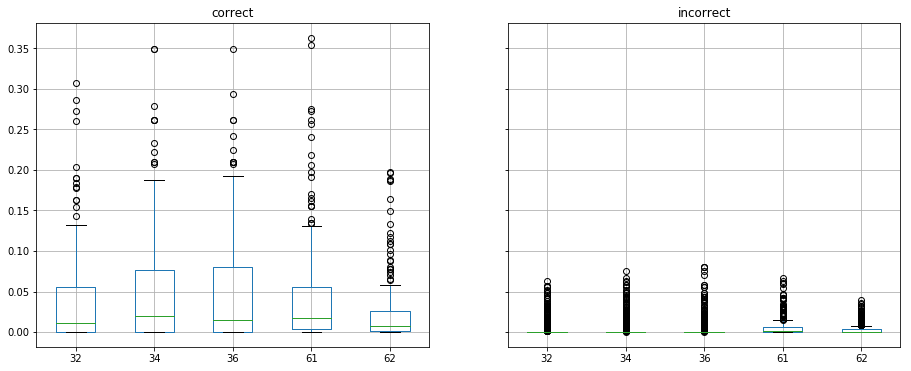

In [22]:

#Delete outiliers that are out of interquartile (Greater than 0.75 and less than 0.25) on specific features

c=xf[xf['VALIDATION']==1][[32,34,36,61,62]]
Q1 = c.quantile(0.25)
Q3 = c.quantile(0.75)
IQR = Q3 - Q1
dfoc = c[~((c < (Q1 - 1.5 * IQR)) |(c > (Q3 + 1.5 * IQR))).any(axis=1)]
dfoc['key'] = 'correct'
i=xf[xf['VALIDATION']==2][[32,34,36,61,62]]
Q1 = i.quantile(0.25)
Q3 = i.quantile(0.75)
IQR = Q3 - Q1
dfo = i[~((i < (Q1 - 1.5 * IQR)) |(i > (Q3 + 1.5 * IQR))).any(axis=1)]
dfo['key'] = 'incorrect'

plt.figure()
DF = pd.concat([dfoc,dfo],keys=['correct','incorrect'])
DFGroup = DF.groupby(['key'])
ax=DFGroup.boxplot()
plt.show()

** (X,Y):** initial data X1=data <br>
** (X1,Y1):** data without outliers <br>
** (X2,Y2):** initial data + "contextual triples" updated <br>

**Preparing data without outliers**

In [23]:
#dfoc= correct triples without outliers
#dfo= incorrect triples wihout outliers
dt=pd.concat([dfoc,dfo])
print("Total triples without outliers: ", dt.shape)
print("Total correct triples without outliers: ", dt[dt['key']=='correct'].shape)
print("Total incorrect triples without outliers: ", dt[dt['key']=='incorrect'].shape)
dt['key']=np.where(dt['key']=='correct',1, 2)
# Data for training models
setToTrain=set(dt.index.tolist())
dt=xf[xf.index.isin(list(setToTrain))]
X1=dt.iloc[:,:-1].values
Y1=dt['VALIDATION'].values
#Use True for average and False for class 1.


Total triples without outliers:  (655, 6)
Total correct triples without outliers:  (195, 6)
Total incorrect triples without outliers:  (460, 6)


**Classification all triples**

In [24]:
classify(X1,Y1)

***  KNN  ***
Precision:  0.6611153866842094
Recall:  0.6564885496183205
F1-score:  0.657708498248707
***  Decision Tree  ***
Precision:  0.7397384530958722
Recall:  0.7427480916030534
F1-score:  0.657708498248707
***  Random Forest  ***
Precision:  0.7659366955815541
Recall:  0.7732824427480915
F1-score:  0.7619965785885829
***  Naive Bayes  ***
Precision:  0.7057130297520887
Recall:  0.7251908396946565
F1-score:  0.6754162026622746


** Classification Correct triples **

In [25]:
classify(X1,Y1, False)

***  KNN  ***
Precision:  0.42955384403858526
Recall:  0.4435897435897436
F1-score:  0.43382582637981526
***  Decision Tree  ***
Precision:  0.5921901562884947
Recall:  0.5897435897435898
F1-score:  0.43382582637981526
***  Random Forest  ***
Precision:  0.661393152433197
Recall:  0.4666666666666666
F1-score:  0.5448453007694687
***  Naive Bayes  ***
Precision:  0.5482478632478631
Recall:  0.19743589743589746
F1-score:  0.2886462749237444


** Classification data + "contextual" triples **

In [26]:
classify(X2,Y2, False)

***  KNN  ***
Precision:  0.4165274754876288
Recall:  0.4321428571428571
F1-score:  0.42306906308846504
***  Decision Tree  ***
Precision:  0.5388510254200155
Recall:  0.5625
F1-score:  0.42306906308846504
***  Random Forest  ***
Precision:  0.628844879766097
Recall:  0.5035714285714287
F1-score:  0.5555948855317747
***  Naive Bayes  ***
Precision:  0.4202503057531753
Recall:  0.2964285714285714
F1-score:  0.3156552166068416


 ### The best algorithm is Random Forest with 0.64% Precision for Correct Triples and 0.75% in average for data without outliers

## Testing best model over new data (outliers)

In [27]:
setAll=set(xf.index.tolist())
setFiltered=setAll-setToTrain
outliers1=xf[xf.index.isin(list(setFiltered))]
print("Outliers: ", outliers1.shape[0])
RF=  RandomForestClassifier(max_depth=3,random_state=101, max_features=None, min_samples_leaf=3)
RF.fit(X1,Y1)
X_test1=outliers1.iloc[:,:-1].values
y_test1=outliers1['VALIDATION'].values
y_pred1=RF.predict(X_test1)
print(classification_report(y_test1, y_pred1))
print("OUTLIERS")
print(y_test1)
print("PREDICTED")
print(y_pred1)

Outliers:  197
              precision    recall  f1-score   support

           1       0.27      1.00      0.43        50
           2       1.00      0.08      0.15       147

   micro avg       0.31      0.31      0.31       197
   macro avg       0.64      0.54      0.29       197
weighted avg       0.81      0.31      0.22       197

OUTLIERS
[2 2 1 2 2 2 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 2 1 2
 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 1 2 2 2
 1 2 1 2 2 2 2 1 2 2 1 1 2 2 2 2 2 2 1 1 1 2 1 1 2 1 2 2 2 2 2 2 1 2 2 1 2
 2 1 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2
 2 2 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 1 2 2 2 2 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2]
PREDICTED
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 

0.27% precision for class 1 applying Random Forest and just 0.31% in average recall is not enough

In [28]:
data[data.index.isin(outliers1[outliers1['VALIDATION']==1].index.tolist())][['47','48','49','50','61','62','TABLE','CELL','NAME_COL1','NAME_COL2','ENTITY_COL1','PREDICATE','ENTITY_COL2']].head(2)

,47,48,49,50,61,62,TABLE,CELL,NAME_COL1,NAME_COL2,ENTITY_COL1,PREDICATE,ENTITY_COL2
55,58817,6,0,58817,0.602756,0.533935,560380.10,3:3:2,player@3,posit@3,https://en.wikipedia.org/wiki/Vladimir_Nikolov...,P413 :position played on team / speciality@en,https://en.wikipedia.org/wiki/Midfielder :Q193592
68,372150,8,1,17465,0.559276,0.477559,804035.2,13:3:1,player@3,spancol@4,https://en.wikipedia.org/wiki/Kim_Young-wook :...,P27 :country of citizenship@en,https://en.wikipedia.org/wiki/South_Korea :Q884


In [57]:
lr=linear_model.LogisticRegression()
lr.fit(X1, Y1)
pred_lr=lr.predict(X_test1)
print(classification_report(pred_lr, y_test1))

              precision    recall  f1-score   support

           1       0.22      0.67      0.33        15
           2       0.94      0.69      0.80       116

   micro avg       0.69      0.69      0.69       131
   macro avg       0.58      0.68      0.56       131
weighted avg       0.86      0.69      0.74       131



### Applying Stochastic Gradient Descent Classifier to get thresholds

In [29]:

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X1,Y1)
ys_pred=sgd_clf.predict(X_test1)
print(classification_report(y_test1, ys_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        50
           2       0.75      1.00      0.85       147

   micro avg       0.75      0.75      0.75       197
   macro avg       0.37      0.50      0.43       197
weighted avg       0.56      0.75      0.64       197



/home/jhomara/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


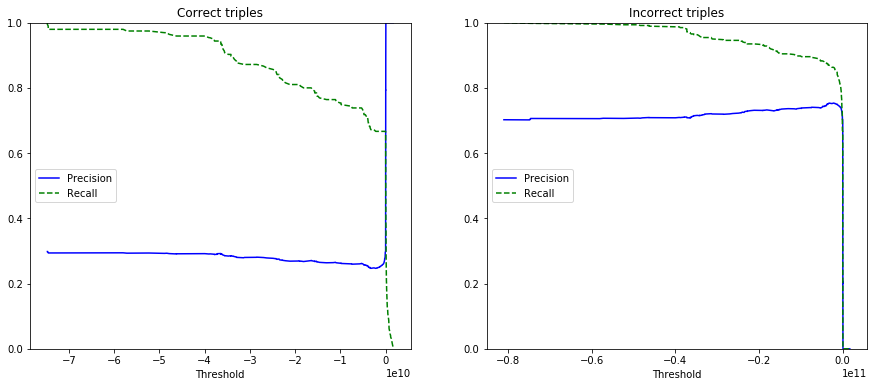

In [30]:


def plot_precision_recall_vs_threshold(fig, precisions, recalls, thresholds):
    fig.plot(thresholds, precisions[:-1], "b-", label="Precision")
    fig.plot(thresholds, recalls[:-1], "g--", label="Recall")
    fig.set_xlabel("Threshold")
    fig.legend(loc="center left")
    fig.set_ylim([0,1])

f, (ax1,ax2)=plt.subplots(1,2)
y_scores1=cross_val_predict(sgd_clf, X1, Y1, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(Y1,y_scores1, pos_label=1)
plot_precision_recall_vs_threshold(ax1, precisions, recalls, thresholds)
ax1.set_title("Correct triples")
precisions, recalls, thresholds = precision_recall_curve(Y1,y_scores1, pos_label=2)
plot_precision_recall_vs_threshold(ax2, precisions, recalls, thresholds)
ax2.set_title("Incorrect triples")
plt.show()

## Precision vs Recall Random Forest

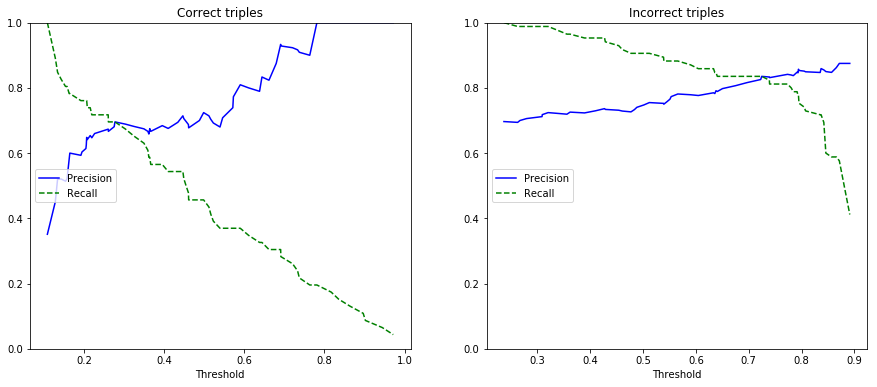

In [31]:


f, (ax1,ax2)=plt.subplots(1,2)
RF=RandomForestClassifier(max_depth=3,random_state=101, max_features=None, min_samples_leaf=3)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2,random_state=0)
RF.fit(X_train1, y_train1)
y_scores1=RF.predict_proba(X_test1)

precisions, recalls, thresholds = precision_recall_curve(y_test1,y_scores1[:,0], pos_label=1)
plot_precision_recall_vs_threshold(ax1, precisions, recalls, thresholds)
ax1.set_title("Correct triples")
precisions, recalls, thresholds = precision_recall_curve(y_test1,y_scores1[:,1], pos_label=2)
plot_precision_recall_vs_threshold(ax2, precisions, recalls, thresholds)
ax2.set_title("Incorrect triples")
plt.show()

#### The method predict_proba of RandomForest give a positive and negative probability for each sample, for example [9.99169610e-01, 8.30390214e-04] where left probability indicates if example is correct and right probability  otherwise.  

### ROC (Receiver operating characteristic) TPR vs FPS

In [32]:
from sklearn.metrics import roc_curve, auc
def probability_analysis(fig, X,Y, X_test=None, y_test=None, label=1):
    RF=RandomForestClassifier(max_depth=3,random_state=101, max_features=None, min_samples_leaf=3)
    if X_test is not None:
        X_train=X
        y_train=Y
        if label==1:
            y_score = RF.fit(X_train, y_train).predict_proba(X_test)[:, 0]
        else:
            y_score = RF.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=0)
        if label==1:
            y_score = RF.fit(X_train, y_train).predict_proba(X_test)[:, 0]
        else:
            y_score = RF.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    #labels=[1,2]
    th=dict()
    #for i in labels:
    fpr[label], tpr[label], th[label] = roc_curve(y_test, y_score,  pos_label=label)
    roc_auc[label] = auc(fpr[label], tpr[label])
    print(roc_auc)
    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel(), pos_label=label)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    print(roc_auc)
    plt.figure()
    lw = 2
    fig.plot(fpr[label], tpr[label], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[label])
    fig.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    fig.set_xlim([0.0, 1.0])
    fig.set_ylim([0.0, 1.05])
    fig.set_xlabel('False Positive Rate')
    fig.set_ylabel('True Positive Rate')
    fig.set_title('Receiver operating characteristic example - Random Forest')
    fig.legend(loc="lower right")

{1: 0.7994884910485933}
{1: 0.7994884910485933, 'micro': 0.7994884910485933}
{2: 0.7994884910485933}
{2: 0.7994884910485933, 'micro': 0.7994884910485933}


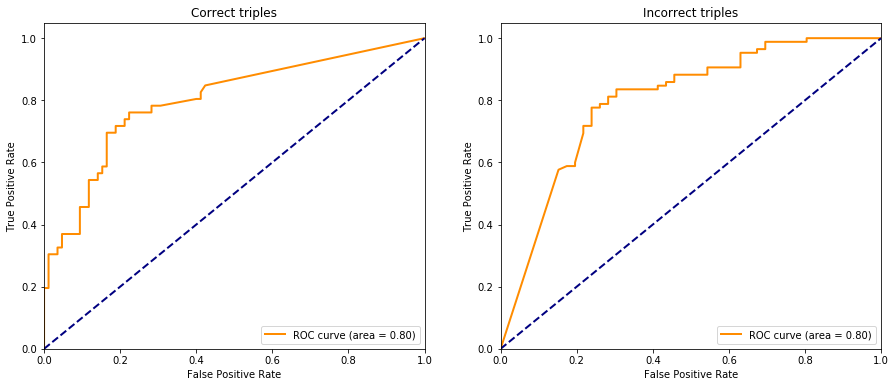

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [33]:
#We get probability
f, (ax1,ax2)=plt.subplots(1,2)
probability_analysis(ax1,X1,Y1, label=1)
ax1.set_title("Correct triples")
probability_analysis(ax2,X1,Y1, label=2)
ax2.set_title("Incorrect triples")
plt.show()

### The figure shows that algorithm can differentiate two classes with 0.80% probability, if we increase the threshold for more positive values (TRP), we could get more false positives (Decrease the specificity FPR). 

### A little note:

In [34]:
X=xf.copy()
del X[31]
del X[32]
del X[33]
del X[34]
del X[35]
del X[36]
X=X.iloc[:,:-1].values
Y=xf['VALIDATION'].values
classify(X,Y, False)

***  KNN  ***
Precision:  0.41761573192855506
Recall:  0.4122448979591836
F1-score:  0.4136329029038114
***  Decision Tree  ***
Precision:  0.48109785811672606
Recall:  0.4795918367346938
F1-score:  0.4136329029038114
***  Random Forest  ***
Precision:  0.6333590967801122
Recall:  0.5020408163265306
F1-score:  0.5569815111640232
***  Naive Bayes  ***
Precision:  0.4004578017113891
Recall:  0.21428571428571427
F1-score:  0.2729042866751755


# Adding data to training set (correct triples)

In [59]:
dataCorrect = pd.read_csv('sampleCorrect300.csv',sep="\t", decimal=",", index_col=False)
print("Size: ", data.shape)
#data1=data[data['ORIGIN']=='f']
dataCorrect=pd.merge(dataCorrect, clusters, on=['CLUSTER'])
dataCorrect.head(3)


Size:  (852, 71)


,1,2,3,4,5,6,7,8,9,10,...,ORIGIN,CLUSTER,TABLE,CELL,NAME_COL1,NAME_COL2,ENTITY_COL1,PREDICATE,ENTITY_COL2,65
0,0,4,12,6,2.000000,36,2,3,12,12,...,f,72,836544.4,1:2:3,name@3,nation@3,https://en.wikipedia.org/wiki/Marlies_G%C3%B6h...,P1532 :country for sport@en,https://en.wikipedia.org/wiki/East_Germany :Q1...,2632
1,0,6,12,6,2.000000,42,2,3,12,12,...,f,72,798568.6,11:2:3,name@3,nation@3,https://en.wikipedia.org/wiki/Grace_Claxton :Q...,P1532 :country for sport@en,https://en.wikipedia.org/wiki/Puerto_Rico :Q1183,2632
2,0,3,13,6,2.166667,33,2,3,10,10,...,f,72,989152.3,9:2:3,name@3,nation@3,https://en.wikipedia.org/wiki/Andrea_Nuti :Q28...,P27 :country of citizenship@en,https://en.wikipedia.org/wiki/Italy :Q38,2632


## Testing models over new data

In [36]:
print("New data:")
xf1=filterFeatures(dataCorrect)
X_old=xf.iloc[:,:-1].values
Y_old=xf['VALIDATION'].values
X_new=xf1.iloc[:,:-1].values
Y_new=xf1.iloc[:,-1].values

RF=RandomForestClassifier(max_depth=3,random_state=101, max_features=None, min_samples_leaf=3)
RF.fit(X_old, Y_old)
pred_new=RF.predict(X_new)
print(classification_report(Y_new, pred_new))

New data:
Number of correct triples:  (300, 59)
Number of incorrect triples:  (0, 59)
              precision    recall  f1-score   support

           1       1.00      0.64      0.78       300
           2       0.00      0.00      0.00         0

   micro avg       0.64      0.64      0.64       300
   macro avg       0.50      0.32      0.39       300
weighted avg       1.00      0.64      0.78       300



/home/jhomara/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Testing models over new training set

In [37]:
#Append new data to initial group.
xfNew=xf.append(xf1)
xfNew.shape
X2=xfNew.iloc[:,:-1].values
Y2=xfNew['VALIDATION'].values
print("New training set")
print("New number of correct triples:", xfNew[xfNew['VALIDATION']==1].shape[0])
print("New number of incorrect triples:", xfNew[xfNew['VALIDATION']==2].shape[0])
classify(X2,Y2, False)

New training set
New number of correct triples: 545
New number of incorrect triples: 607
***  KNN  ***
Precision:  0.5943898225403085
Recall:  0.6155963302752294
F1-score:  0.6043296336084325
***  Decision Tree  ***
Precision:  0.7495214609100638
Recall:  0.7660550458715596
F1-score:  0.6043296336084325
***  Random Forest  ***
Precision:  0.8395112369303233
Recall:  0.7577981651376147
F1-score:  0.796161323562001
***  Naive Bayes  ***
Precision:  0.478737941214942
Recall:  0.938532110091743
F1-score:  0.6340109770514458


## Precision vs Recall (new training set)

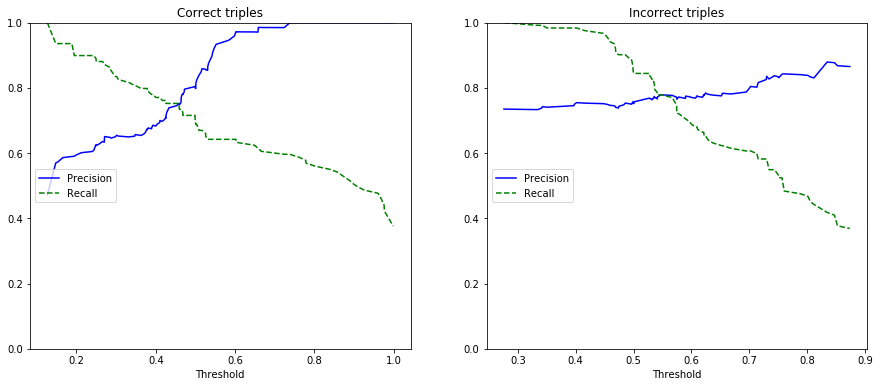

In [38]:
f, (ax1,ax2)=plt.subplots(1,2)
RF=RandomForestClassifier(max_depth=3,random_state=101, max_features=None, min_samples_leaf=3)
X_train2, X_test2, y_train2, y_test2= train_test_split(X2, Y2, test_size=0.2,random_state=0)
RF.fit(X_train2, y_train2)
y_scores2=RF.predict_proba(X_test2)

precisions, recalls, thresholds = precision_recall_curve(y_test2,y_scores2[:,0], pos_label=1)
plot_precision_recall_vs_threshold(ax1, precisions, recalls, thresholds)
ax1.set_title("Correct triples")

precisions, recalls, thresholds = precision_recall_curve(y_test2,y_scores2[:,1], pos_label=2)
plot_precision_recall_vs_threshold(ax2, precisions, recalls, thresholds)
ax2.set_title("Incorrect triples")
plt.show()

## Setting Threshold

In [39]:
# If I use 0.55 as probability threshold I will get 0.75% precision and recall.

y_pred_55=np.where(y_scores2[:,0]>=0.55,1,2)
print("Precision:", precision_score(y_test2, y_pred_55))
print("Recall: ", recall_score(y_test2, y_pred_55))

Precision: 0.9333333333333333
Recall:  0.6422018348623854


## ROC curve (new training set)

{1: 0.8525342156715296}
{1: 0.8525342156715296, 'micro': 0.8525342156715296}
{2: 0.8525342156715295}
{2: 0.8525342156715295, 'micro': 0.8525342156715295}


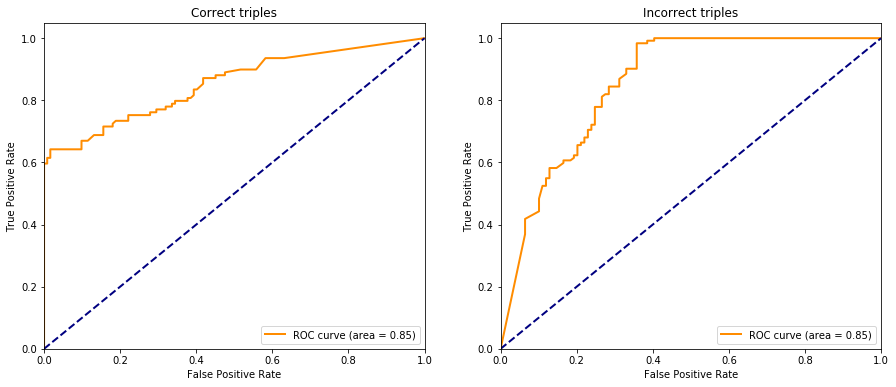

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [40]:
#Plot ROC curve for all data, including correct triples added. 

f, (ax1,ax2)=plt.subplots(1,2)
probability_analysis(ax1,X2,Y2, label=1)
ax1.set_title("Correct triples")
probability_analysis(ax2,X2,Y2, label=2)
ax2.set_title("Incorrect triples")
plt.show()

### Adding correct triples the performance is good, but it is necesary to know that the most of triples in dataset are generated with predicates extracted from cluster and correct triples extracted from cluster are less than 10%

In [41]:
#If features of table are not included, the results are similar. 
#Without table features.
test=xfNew.copy()
X3=test.iloc[:,:-1].values
Y3=test['VALIDATION'].values
classify(X3,Y3, False)

***  KNN  ***
Precision:  0.613416864029069
Recall:  0.5743119266055047
F1-score:  0.5925192539663053
***  Decision Tree  ***
Precision:  0.761142885136081
Recall:  0.7798165137614678
F1-score:  0.5925192539663053
***  Random Forest  ***
Precision:  0.8371143583349878
Recall:  0.7587155963302752
F1-score:  0.7951572913645063
***  Naive Bayes  ***
Precision:  0.4820321546522185
Recall:  0.9477064220183488
F1-score:  0.638984536125243


### Removing outliers from new training set

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


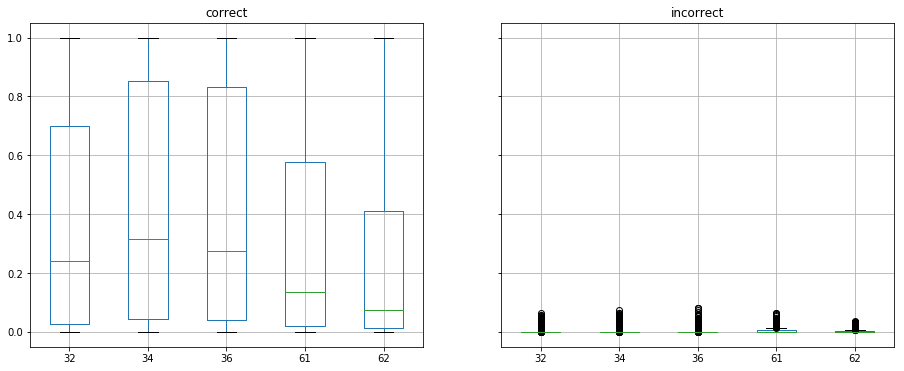

In [42]:
c=xfNew[xfNew['VALIDATION']==1][[32,34,36,61,62]]
Q1 = c.quantile(0.25)
Q3 = c.quantile(0.75)
IQR = Q3 - Q1
dfoc = c[~((c < (Q1 - 1.5 * IQR)) |(c > (Q3 + 1.5 * IQR))).any(axis=1)]
dfoc['key'] = 'correct'

i=xfNew[xfNew['VALIDATION']==2][[32,34,36,61,62]]
Q1 = i.quantile(0.25)
Q3 = i.quantile(0.75)
IQR = Q3 - Q1
dfo = i[~((i < (Q1 - 1.5 * IQR)) |(i > (Q3 + 1.5 * IQR))).any(axis=1)]
dfo['key'] = 'incorrect'

DF = pd.concat([dfoc,dfo],keys=['correct','incorrect'])
DFGroup = DF.groupby(['key'])
ax=DFGroup.boxplot()
plt.show()

In [43]:
#Training Naive Bayes:
#Measure evaluated for correct triples
dt=pd.concat([dfoc,dfo])
print("Total triples without outliers: ", dt.shape)
print("Total correct triples without outliers: ", dt[dt['key']=='correct'].shape)
print("Total incorrect triples without outliers: ", dt[dt['key']=='incorrect'].shape)
dt['key']=np.where(dt['key']=='correct',1, 2)
"""
del xfNew[31]
del xfNew[32]
del xfNew[33]
del xfNew[34]
del xfNew[35]
del xfNew[36]
"""
setAll=set(xfNew.index.tolist())
setToTrain=set(dt.index.tolist())
alld=xfNew[xfNew.index.isin(list(setToTrain))]

X4=alld.iloc[:,:-1].values
Y4=alld['VALIDATION'].values

setFiltered=setAll-setToTrain
outliers=xfNew[xfNew.index.isin(list(setFiltered))]
print("Outliers: ", outliers.shape)
RF=RandomForestClassifier(max_depth=3,random_state=101, max_features=None, min_samples_leaf=3)
RF.fit(X4,Y4)
X_test4=outliers.iloc[:,:-1].values

y_test4=outliers['VALIDATION'].values
y_pred4=RF.predict(X_test4)
print(classification_report(y_test4, y_pred4))
print("OUTLIERS")
print(y_test4)
print("PREDICTED")
print(y_pred4)

Total triples without outliers:  (1005, 6)
Total correct triples without outliers:  (545, 6)
Total incorrect triples without outliers:  (460, 6)
Outliers:  (126, 59)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.12      0.21       126

   micro avg       0.12      0.12      0.12       126
   macro avg       0.50      0.06      0.11       126
weighted avg       1.00      0.12      0.21       126

OUTLIERS
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
PREDICTED
[1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2
 2 1 1

/home/jhomara/.local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [44]:
#See outliers
#test=data.append(dataCorrect)
#test[test.index.isin(list(setFiltered))].iloc[:,50:]

## Regression Models

In [45]:
def logistic(z):
    return 1. / (1. + nd.exp(-z))

def lossf(output, y):
    newy=logistic(output)
    return- nd.nansum(  y * nd.log(newy) + (1-y) * nd.log(1-newy))

In [56]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.3,shuffle=3)

#Logistic Regression

lr=linear_model.LogisticRegression()
lr.fit(X_train4, y_train4)
pred_lr=lr.predict(X_test4)
print(classification_report(pred_lr, y_test4))
y_traint4=np.where(y_train4==1,0.75,0.45)
y_testt4=np.where(y_test4==1,0.75,0.45)

"""y_traint3=nd.array(np.where(y_train3==1,1,0))
y_testt3=nd.array(np.where(y_test3==1,1,0))
y_traint3=logistic(y_traint3).asnumpy()
y_testt3=logistic(y_testt3).asnumpy()
print(len(y_traint3))
print(X_train3.shape)
print(len(y_testt3))"""

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       206
           2       0.57      0.81      0.67       102

   micro avg       0.74      0.74      0.74       308
   macro avg       0.73      0.76      0.73       308
weighted avg       0.78      0.74      0.74       308



'y_traint3=nd.array(np.where(y_train3==1,1,0))\ny_testt3=nd.array(np.where(y_test3==1,1,0))\ny_traint3=logistic(y_traint3).asnumpy()\ny_testt3=logistic(y_testt3).asnumpy()\nprint(len(y_traint3))\nprint(X_train3.shape)\nprint(len(y_testt3))'

In [54]:
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(max_iter=100),
    linear_model.BayesianRidge(),    
    RandomForestRegressor()]

for item in classifiers:
    #print(item)
    clf = item
    print("\n")
    print("***** ",type(clf).__name__," *****"+"\n")  
    clf.fit(X_train4, y_traint4)
    pred4=clf.predict(X_test4)
    #print('Accuracy of {} on test set: {:.2f}'.format(type(clf).__name__,logreg.score(X_test3, y_testt3)))

    print("R2 score : %.2f" % r2_score(y_testt4,pred4))
    print("Mean squared error: %.2f" % mean_squared_error(y_testt4, pred4))
    er = []
    g = 0
    meany=np.mean(pred4)
    for i in range(len(y_testt4)):
        #print( "actual=", y_testt3[i], " observed=", pred3[i])
        x = (y_testt4[i] - pred4[i]) **2
        er.append(x)        
        g = g + x

    x = 0
    for i in range(len(er)):
        x = x + er[i]
    print ("MSE", x / len(er))

    v = np.var(er)
    print ("variance", v)
    print ("average of errors ", np.mean(er))
    m = np.mean(y_testt4)
    print ("average of observed values", m)

    y = 0
    for i in range(len(y_testt4)):
        y = y + ((y_testt4[i] - m) ** 2)

    print ("total sum of squares", y)
    print ("ẗotal sum of residuals ", g)
    print ("r2 calculated", 1 - (g / y))


#logreg = LinearRegression()
#logreg.fit(X_train3, y_traint3)
#pred3=logreg.predict(X_test3)
#print('Accuracy of LR Classifier on test set: {:.2f}'.format(logreg.score(X_test3, y_testt3)))



*****  SVR  *****

R2 score : 0.16
Mean squared error: 0.02
MSE 0.018851278978259067
variance 0.00013239253334313843
average of errors  0.01885127897825907
average of observed values 0.6038961038961039
total sum of squares 6.92532467532468
ẗotal sum of residuals  5.806193925303792
r2 calculated 0.1615997519955149


*****  SGDRegressor  *****

R2 score : -144649426922551767639277611446980243881984.00
Mean squared error: 3252416381617925579184341853343611617280.00
MSE 3.252416381617926e+39
variance 2.0009878243095055e+80
average of errors  3.2524163816179256e+39
average of observed values 0.6038961038961039
total sum of squares 6.92532467532468
ẗotal sum of residuals  1.0017442455383212e+42
r2 calculated -1.4464942692255167e+41


*****  BayesianRidge  *****

R2 score : 0.48
Mean squared error: 0.01
MSE 0.011630366717179031
variance 0.00013721207673498027
average of errors  0.011630366717179022
average of observed values 0.6038961038961039
total sum of squares 6.92532467532468
ẗotal sum

In [ ]:
logistic(nd.array([0,0,1,1]))

In [ ]:
xd=mx.nd.arange(58,dtype='float32').reshape(1,58)
net(xd)

In [58]:
import mxnet as mx
from mxnet import nd, autograd, gluon
data_ctx = mx.cpu()
model_ctx = mx.cpu()
batch_size=100
y_traint3=np.where(y_train3==1,0,1)
y_testt3=np.where(y_test3==1,0,1)
train_data=gluon.data.DataLoader(gluon.data.ArrayDataset(X_train3.astype(np.float64), y_traint3.astype(np.float64)),
                                batch_size=batch_size, shuffle=True)
test_data=gluon.data.DataLoader(gluon.data.ArrayDataset(X_test3.astype(np.float64), y_testt3.astype(np.float64)),
                                batch_size=batch_size, shuffle=True)
net = gluon.nn.Dense(1)
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})

epochs = 50
loss_sequence = []
num_examples = len(X_train3)
#train_data=train_data.cast(dtype='float64')
for e in range(epochs):
    cumulative_loss = 0
    
    for i, (data, label) in enumerate(train_data):
        
        data= data.astype(dtype='float32')
        
        data = data.as_in_context(model_ctx)
        label= label.astype(dtype='float32')
        print(label)
        label = label.as_in_context(model_ctx)
        with autograd.record():            
            output = net(data)
            #print(output,label)
            loss = lossf(output, label)
        loss.backward()
        trainer.step(batch_size)
        cumulative_loss += nd.sum(loss).asscalar()
    print("Epoch %s, loss: %s" % (e, cumulative_loss ))
    loss_sequence.append(cumulative_loss)
print(loss_sequence)

NameError: name 'y_train3' is not defined

In [ ]:
plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('average loss',fontsize=14)

In [ ]:
num_correct = 0.0
num_total = len(X_test3)
for i, (data, label) in enumerate(test_data):
    data = data.as_in_context(model_ctx)
    data= data.astype(dtype='float32')
    label = label.as_in_context(model_ctx)
    label= label.astype(dtype='float32')
    output = net(data)
    prediction = (nd.sign(output) + 1) / 2
    num_correct += nd.sum(prediction == label)
print("Accuracy: %0.3f (%s/%s)" % (num_correct.asscalar()/num_total, num_correct.asscalar(), num_total))

# Features Evaluation

# Tunning Random Forest

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
RF=RandomForestClassifier(min_samples_split=3, max_depth=5, n_estimators=5, min_samples_leaf=3, max_features=3, bootstrap=True)
RF.fit(X_train3, y_train3)
y_scores3=RF.predict_proba(X_test1)
#y_testt3=[[0.2,0.8]if v==2 else[0.8,0.2]for v in y_test3]
#y_testt3=np.array(y_testt3)
#error1=(y_scores3[:,0]-y_testt3[:,0])**2
#print(np.mean(error1))

In [ ]:
print(y_test1)
prob_pred=np.where(y_scores3[:,0]<=0.5,2,1)
print(prob_pred)
print(classification_report(y_test1, prob_pred))

In [ ]:
x_filteredf=xfNew[[20,48,47,49,50,42,30,28,41,39,29,40,27,45,46,26,32,36,61,62]]
y_filteredf=xfNew[['VALIDATION']]
RF=RandomForestClassifier(min_samples_split=3, max_depth=5, n_estimators=5, min_samples_leaf=3, max_features=3, bootstrap=True)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(x_filteredf.values, y_filteredf['VALIDATION'].values, test_size=0.3,random_state=0)
RF.fit(Xf_train, yf_train)
yf_scores=RF.predict_proba(Xf_test)

In [ ]:
import seaborn as sns
sns.set(style="ticks")
x_plot=pd.DataFrame(Xf_test,columns=[20,48,47,49,50,42,30,28,41,39,29,40,27,45,46,26,32,36,61,62])
print(x_plot.shape)
df_score=pd.DataFrame({'score':yf_scores[:,0]})
print(df_score.shape)
x_plot=pd.concat([x_plot, df_score], axis=1)
x_plot=pd.concat([x_plot, pd.DataFrame({'class':yf_test})], axis=1)
x_plot.head()
#x_plot.head()
#x_plot.head()
#x_plot['class']=np.where(x_plot['VALIDATION']==1,'Correct', 'Incorrect')
#del x_plot['VALIDATION']
#print(x_plot[x_plot['class']=='Correct'].shape)
#print(x_plot[x_plot['class']=='Incorrect'].shape)
sns.pairplot(x_plot[[32,36,61,62, 'score','class']],vars=[32,36,61,62, 'score'], hue='class')


In [ ]:
sns.pairplot(x_plot[[20,27,28,29,30,'score','class']],vars=[20,27,28,29,30,'score'], hue='class')

In [ ]:
sns.pairplot(x_plot[[39,40,41,42,45,46,47,48,49,50,'score','class']],vars=[39,40,41,42,45,46,47,48,49,50,'score'], hue='class')

In [ ]:

for i, c in enumerate([20,48]):#(x_filteredf.columns):
    plt.figure(figsize=(8,5))    
    plt.scatter(np.arange(Xf_test1.shape[0]),Xf_test1[:,i])
    plt.scatter(np.arange(Xf_test1.shape[0]),yf_scores[:,0])

In [ ]:
#Saving trained model
import pickle
cl5 = GaussianNB()
cl5.fit(X,Y)
filename = 'trainedModelNoise2.sav'
pickle.dump(cl5, open(filename, 'wb'))

# Some stats

## Models comparison

In [ ]:
# Compare Algorithms Weighted average
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

seed = 7
models = []
cl1 = KNeighborsClassifier(n_neighbors=1)
cl2 = DecisionTreeClassifier()
cl3 = RandomForestClassifier(max_depth=10,max_features=None, min_samples_leaf=3)
cl4=  SVC(kernel='linear')
cl5 = GaussianNB()
models.append(('KNN',cl1))
models.append(('DT', cl2))
models.append(('RF', cl3))
#models.append(('SVM', cl4))
models.append(('GNB', cl5))
results = []
names = []
scoring = 'f1_weighted'
for name, model in models:
    #kfold = model_selection.KFold(n_splits=40, random_state=seed)
    kfold = StratifiedShuffleSplit(n_splits=40, test_size=0.2) 
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Graph decision Tree 
"""
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
model = RandomForestClassifier(n_estimators=10)
Xtree=xf[[14,17,20,19,36,8,25,24,6,4,35,34,18,32,13,7,11,33,10,15,9,3,2]]
print(Xtree.head(2))
Xtreev=Xtree.values

model.fit(Xtreev, y)
fnames=[str(fn) for fn in list(Xtree.columns)]
cnames=[str(v) for v in set(y.values)]
print(fnames)
print(cnames)

estimator = model.estimators_[0]

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = fnames,
                class_names = cnames,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')"""

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.10, 1.0, 20)):
    
    plt.figure(figsize=(6,5))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    print('learning curve')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_weighted')
    print('learning curve2')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve (Random Forest)"
# Cross validation with 40 splits,  each time with 20% as validation set.
cv = StratifiedShuffleSplit(n_splits=40, test_size=0.2, random_state=7)
estimator = RandomForestClassifier(max_depth=10,random_state=101, max_features=None, min_samples_leaf=3)
print('estimator 1')
plot_learning_curve(estimator, title, X1, Y1, ylim=(0.1, 1.01), cv=cv, n_jobs=4)

title = r"Learning Curves (Decision Tree)"
cv = StratifiedShuffleSplit(n_splits=40, test_size=0.2, random_state=7)

estimator = DecisionTreeClassifier()
print('estimator 2')
plot_learning_curve(estimator, title, X1, Y1, (0.1, 1.01), cv=cv, n_jobs=4)


plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
#Compute feature importances
forest = ExtraTreesClassifier()
forest.fit(X2, Y2)
columns=np.array(xfNew.columns)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices=indices[0:15]
indices=indices[::-1]
print(len(indices))

col=columns[indices]
print('cols:', col)
# Print the feature ranking
print("Feature ranking:")
lenx=15
print(len(range(lenx)))
for f in range(lenx):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(7,5))
plt.title("Feature importances")
plt.barh(range(lenx), importances[indices],
       color="b", align="center")
plt.yticks(range(lenx), col)
#plt.xlim([-1, lenx])
plt.show()

In [ ]:
def logistic(z):
    return 1. / (1. + np.exp(-z))

def loss(output, y):
    newy=logistic(output)
    #print(newy)
    return - np.nansum(  y * np.log(newy) + (1-y) * np.log(1-newy))

#o=np.array([1,1,1,1,1,1])
#y=np.array([1,1,1,1,1,1])
#loss_log(o,y)
#x = np.arange(-5, 5, .1)
#y = logistic(x)
#print("Sample: ", logistic(0))
#plt.plot(x,y)
#plt.show()

In [ ]:
def loss_log(output, y):
    newy=logistic(output)
    print(newy)
    loss=- np.nansum(  y * np.log(newy) + (1-y) * np.log(1-newy))
    return loss


In [ ]:
import pickle
cl5 = RandomForestClassifier(bootstrap=True, max_depth= 10, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=10)
cl5.fit(X4,Y4)
filename = '/tmp/trainedModelRF.sav'
pickle.dump(cl5, open(filename, 'wb'))